# Read in SMILES molecules

<!-- # References:
[1]: https://asteeves.github.io/blog/2015/01/12/molecules-in-rdkit/
[2]: https://sourceforge.net/p/rdkit/mailman/message/36195052/
[3]: https://pypi.org/project/pysmiles/
[4]: https://www.bsimard.com/2018/04/25/graph-viz-with-sigmajs.html
[5]: https://reactionmechanismgenerator.github.io/RMG-Py/index.html
[6]:http://bora.uib.no/bitstream/handle/1956/3287/Dr.thesis_%20KT_Kalleberg.pdf?sequence=1&isAllowed=y
        -->

In [2]:
import pandas as pd
from glob import glob
from rdkit import Chem
from rdkit.Chem import AllChem

%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:


mol_fs = glob('./tox21_dataset-master/compounds/*.tab')
print(mol_fs)
in_df = pd.read_csv(mol_fs[0], sep='\s+',header=0)
in_df.head()

2D Depections

In [4]:
in_df.iloc[2].SMILES
template = Chem.MolFromSmiles(in_df.iloc[2].SMILES)
m = Chem.MolFromSmiles(in_df.iloc[2].SMILES)

AllChem.Compute2DCoords(template)

NameError: name 'in_df' is not defined

In [5]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

In [6]:
DrawingOptions.bondLineWidth=1.5

In [6]:
AllChem.GenerateDepictionMatching2DStructure(m, template)

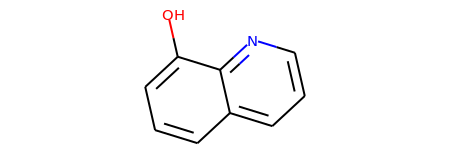

In [7]:
m

In [8]:
m.GetNumAtoms()

11

The text representaiton of this molecule

In [9]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

 11 12  0  0  0  0  0  0  0  0999 V2000
   -1.7578    2.3964    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4243    0.9340    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5240   -0.0861    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1905   -1.5485    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7572   -1.9909    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3425   -0.9709    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7758   -1.4133    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8756   -0.3932    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5421    1.0692    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1088    1.5116    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0090    0.4916    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9 10  1  0
 10 11  2  0
 11  2  1  0
 11  6  1  0
M  END



In [10]:
DrawingOptions.includeAtomNumbers=True

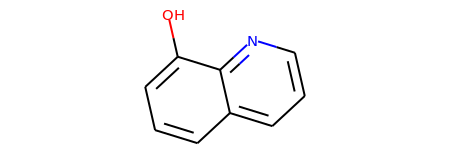

In [11]:
m = Chem.MolFromSmiles(in_df.iloc[2].SMILES)
m

In [12]:
ibuH = AllChem.AddHs(m)

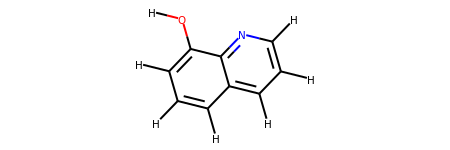

In [13]:
DrawingOptions.includeAtomNumbers=False
ibuH

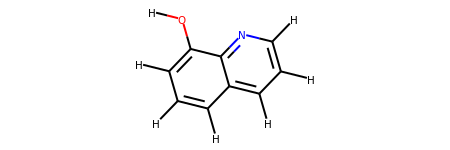

In [14]:
DrawingOptions.includeAtomNumbers=True
ibuH

In [15]:
adj = Chem.GetAdjacencyMatrix(m)
print(adj)

[[0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 1 0 0 0 1 0]]


In [16]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   formal_charge=atom.GetFormalCharge(),
                   chiral_tag=atom.GetChiralTag(),
                   hybridization=atom.GetHybridization(),
                   num_explicit_hs=atom.GetNumExplicitHs(),
                   is_aromatic=atom.GetIsAromatic())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
    return G


In [4]:
import networkx as nx
G = nx.from_numpy_matrix(adj)

NameError: name 'adj' is not defined

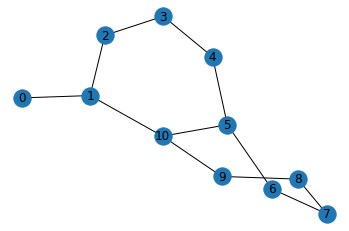

In [22]:
plt.axis('off')
nx.draw_networkx(G)
G.edges()
df =pd.DataFrame(data=list(G.edges()))


In [24]:
df.to_csv('chem.g',sep='\t',header=False, index=False)

## Vertex Replacement Grammars (graph transformation)


In [19]:
!pwd

/home/sal/gstax/gstx_start


In [15]:
!python runner.py -g chem -o out -n 2

main
Graph: chem, n = 11, m = 12 read in 0.003s.
Running leiden clustering...
100%|███████████████████████████████|[00:00<00:00]
graph: chem, mu: 4, type: mu_level_dl clustering: leiden rules: 4(4) mdl: 194.624 bits generated in 0.015 secs

name: chem, original: 187.04439411935846, grammar: 194.62406251802892, time: 0.0178
[2 -> (4, 3), 3 -> (4, 3), 3 -> (3, 2), 0 -> (3, 4){2,3,3}]
Generated graph: (11, 12)
[(4, 5), (4, 7), (5, 6), (6, 9), (7, 14), (8, 9), (9, 10), (10, 11), (10, 14), (11, 12), (12, 13), (13, 14)]


In [7]:
elist = [(4, 5), (4, 7), (5, 6), (6, 11), (7, 14), (8, 9), (8, 13), (9, 10), (10, 11), (11, 14), (12, 13), (13, 14)]
trnxfd_g = nx.from_edgelist(elist)

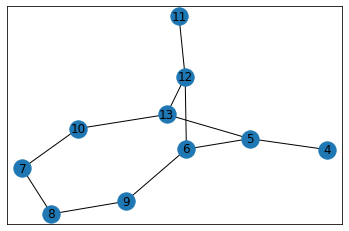

[]

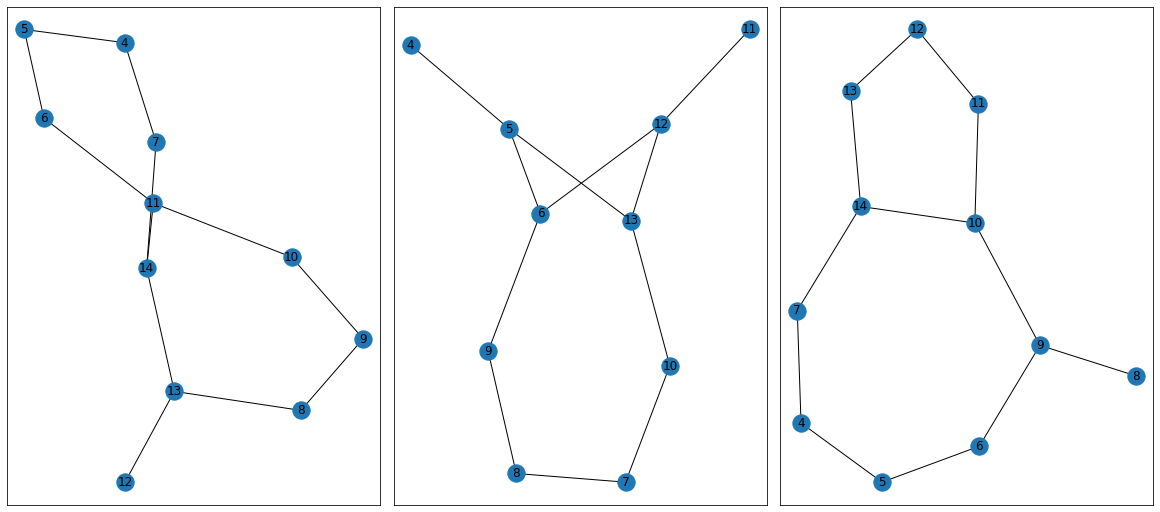

In [16]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(16, 7))
elist = [(4, 5), (4, 7), (5, 6), (6, 11), (7, 14), (8, 9), (8, 13), (9, 10), (10, 11), (11, 14), (12, 13), (13, 14)]
trnxfd_g = nx.from_edgelist(elist)
nx.draw_networkx(trnxfd_g, ax=f1_axes[0])
f1_axes[0].set_xticks([])
f1_axes[0].set_yticks([])
elist = [(4, 5), (5, 6), (5, 13), (6, 9), (6, 12), (7, 8), (7, 10), (8, 9), (10, 13), (11, 12), (12, 13)]
trnxfd_g = nx.from_edgelist(elist)
nx.draw_networkx(trnxfd_g, ax=f1_axes[1])
f1_axes[1].set_xticks([])
f1_axes[1].set_yticks([])
elist = [(4, 5), (4, 7), (5, 6), (6, 9), (7, 14), (8, 9), (9, 10), (10, 11), (10, 14), (11, 12), (12, 13), (13, 14)]
trnxfd_g = nx.from_edgelist(elist)
nx.draw_networkx(trnxfd_g, ax=f1_axes[2])
f1_axes[2].set_xticks([])
f1_axes[2].set_yticks([])

## Signals from Graphs

In [3]:
# 3,4 dimethilhexane CCC(C)C(C)CC
template = Chem.MolFromSmiles("CCC(C)C(C)CC")
m = Chem.MolFromSmiles("CCC(C)C(C)CC")

In [7]:
AllChem.Compute2DCoords(template)

0

In [8]:
AllChem.GenerateDepictionMatching2DStructure(m, template)

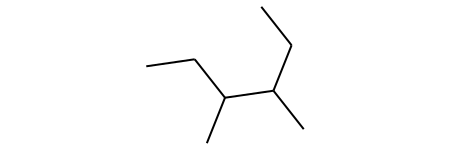

In [10]:
DrawingOptions.includeAtomNumbers=True
m

For an example of derived signals go to the [MathChem notebook](./MolecularSignals.pdf)